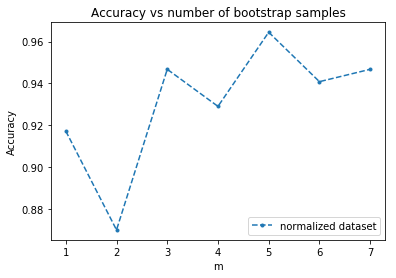

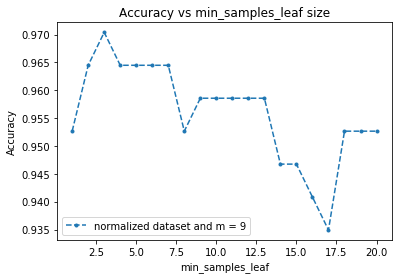

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv

from numpy import genfromtxt
from sklearn.ensemble import RandomForestClassifier

# Read training file
trainX = genfromtxt("train-features.csv", delimiter=',')
trainY = genfromtxt("train-labels.csv", delimiter=',')
n_trainX = trainX / trainX.max(axis=0)

# Read test file
testX = genfromtxt("test-features.csv", delimiter=',')
testY = genfromtxt("test-labels.csv", delimiter=',')
n_testX = testX / trainX.max(axis=0)

m = [1, 2, 3, 4, 5, 6, 7]

# Bagging and Random Forests q1
accuracy = []
for i in range(len(m)):
    # train normalized dataset
    clf = RandomForestClassifier(n_estimators = m[i], random_state = 0)
    clf.fit(n_trainX, trainY)
    
    # compute accuracy
    accuracy.append(clf.score(n_testX, testY))
    
plt.xlabel('m')
plt.ylabel('Accuracy')
plt.title('Accuracy vs number of bootstrap samples')

plt.plot(m, accuracy, '--.', label = 'normalized dataset')
plt.legend(loc='lower right')
plt.show()

# Bagging and Random Forests q2
accuracy = []
min_samples_leaf = []
for i in range(20):
    min_samples_leaf.append(i + 1)
    # train normalized dataset
    clf = RandomForestClassifier(n_estimators = 9, min_samples_leaf = i + 1, random_state = 0)
    clf.fit(n_trainX, trainY)
    
    # compute accuracy
    accuracy.append(clf.score(n_testX, testY))
    
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Accuracy vs min_samples_leaf size')

plt.plot(min_samples_leaf, accuracy, '--.', label = 'normalized dataset and m = 9')
plt.legend(loc='lower left')
plt.show()


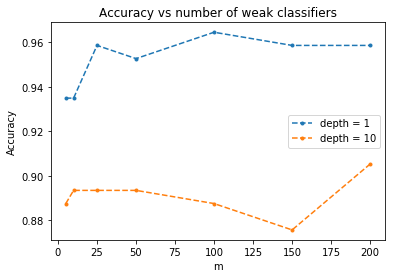

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv

from numpy import genfromtxt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Read training file
trainX = genfromtxt("train-features.csv", delimiter=',')
trainY = genfromtxt("train-labels.csv", delimiter=',')
n_trainX = trainX / trainX.max(axis=0)

# Read test file
testX = genfromtxt("test-features.csv", delimiter=',')
testY = genfromtxt("test-labels.csv", delimiter=',')
n_testX = testX / trainX.max(axis=0)


n = [5, 10, 25, 50, 100, 150, 200]

# Bagging and Random Forests 1
accuracy1 = []
accuracy9 = []
for i in range(len(n)):
    # train depth = 1
    clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1, random_state=0), n_estimators = n[i])
    clf.fit(n_trainX, trainY)
    # compute accuracy
    accuracy1.append(clf.score(n_testX, testY))
    
    # train depth = 10
    clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=10, random_state=0), n_estimators = n[i])
    clf.fit(n_trainX, trainY)
    # compute accuracy
    accuracy9.append(clf.score(n_testX, testY))
    
plt.xlabel('m')
plt.ylabel('Accuracy')
plt.title('Accuracy vs number of weak classifiers')

plt.plot(n, accuracy1, '--.', label = 'depth = 1')
plt.plot(n, accuracy9, '--.', label = 'depth = 10')
plt.legend()
plt.show()
